![resources/images/dhlab-logo-nb.png](../resources/images/dhlab-logo-nb.png)

In [1]:
import dhlab as dh
from dhlab.api.dhlab_api import totals
import dhlab.nbtext as nb

# Kollokasjoner

Kollokasjoner er assosiasjoner.

I denne notebooken viser vi eksempler på undersøkelser man kan gjøre for å finne ut hvilke ord et ord opptrer sammen med innenfor et korpus.

## Konstruer et korpus med Dewey

Se eksempelfil om [Korpusbygging](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/1_Bygg_korpus.ipynb) for andre måter å definere korpus.

For å finne relevant dewey-klassifikasjon kan [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) være til god hjelp.

In [2]:
# korpus med inntil 200 bøker fra dewey 641.2 (drikkevarer) utgitt mellom 1960 og 2020

korpus = dh.Corpus(ddk="641.2%", limit=200)

For å se metadata fra korpuset som dataramme brukes metoden `corpus`. Man kan bruke `head()` for å begrense antall rader som vises.

In [3]:
korpus.corpus.head(2)

,dhlabid,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype,ocr_creator,ocr_timestamp
0,100421311,URN:NBN:no-nb_digibok_2020092507567,Perfekte viner ! : Norges beste vinkjøp,"Tennfjord , Ingvild Wedaa",oai:nb.bibsys.no:991511440284702202,5eb14770961cdcc26b20d9682fa316f4,,Oslo,20150101,2015,Kagge,nob,,641.22 / 641.22,,Faglitteratur,digibok,nb,20060101
1,100422891,URN:NBN:no-nb_digibok_2020100107551,Bobler ! : smaken av fest,"Tennfjord , Ingvild Wedaa",oai:nb.bibsys.no:991421336124702202,57c571200828163beca56b8cc9936433,,Oslo,20140101,2014,Kagge,nob,musserende / vin / champagne,641.22 / 641.2224,,Faglitteratur,digibok,nb,20060101


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `dh.Collocation`. Legg gjerne inn en sjekk med konkordans.

In [4]:
collword = 'rødvin'

In [5]:
# Vi utfører en konkordans for å sjekke at korpuset virker.
# dh.Concordance(corpus=korpus, query="sei").show()
korpus.conc("sei").show()

,link,concordance
6,URN:NBN:no-nb_digibok_2018031548126,"... den enkelte råvare og tilberedningsmetoden det handler om . Sei har en litt tyngre smak , ser litt gråere ut..."
7,URN:NBN:no-nb_digibok_2020112407621,"Sjå Løksli de ligg no so fint fram mæ li , no sei dei at Knut vil te Mæland å..."
3,URN:NBN:no-nb_digibok_2018031548126,vin til melstekt sei
4,URN:NBN:no-nb_digibok_2018031548126,Det er ikke uten grunn at melstekt sei går under betegnelsen seibiff . For seiv om seien er en hvit...
1,URN:NBN:no-nb_digibok_2018042548149,"... men O HVIT FISK , nesten alt går . Sei , hyse , kolje , kveite , hva som helst..."
5,URN:NBN:no-nb_digibok_2020120907530,"Bedales of Borough Market 5 Bedale St , London SEI 9 AL"
2,URN:NBN:no-nb_digibok_2020112407621,"... Ved Bull Run gik de reint gæli . "" "" Men sei me no du Jørn , håfør ha med denna krigen..."
0,URN:NBN:no-nb_digibok_2020112407621,"... Så skulle ølet "" skakast ned "" , det vil sei fyllast over på tunna . Då smaka dei gjerne på ølet..."


Så kan vi hente ut selve kollokasjonen, dvs. ord som står innenfor en viss avstand fra målordet.

In [6]:
# Vi legger inn variablen collword som søkeord, med 5 ord før og etter. 
#  Antall ord før og etter kan endres etter konteksten man vil undersøke.
# Collword er lagt som variabel i cella over, slik at det er lett å gjenbruke notebooken for ulike søkeord

coll = korpus.coll(words=collword, after=5, before=5, samplesize=1000)

In [7]:
# For å vise topp `n` treff bruke .show().head(n)
coll.show().head(5)

,counts
.,371
",",364
og,247
en,224
med,158


Kollokasjonen ligger i en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor. Man får adgang til datarammen gjennom `coll` metoden.

In [8]:
coll.coll.sort_values(by="counts", ascending=False).head(10)

,counts
.,371
",",364
og,247
en,224
med,158
er,123
som,110
i,100
til,98
av,83



### Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Bokhylla aggregert

```totals``` inneholder råfrekvenser fra Nasjonalbibliotekets katalog.

In [9]:
tot = totals(50000)

In [10]:
tot.head()

,freq
.,7655423257
",",5052171514
i,2531262027
og,2520268056
-,1314451583


#### Aggregert korpus

In [11]:
# dh.Counts teller tokens i hver tekst i korpus
dokumenter_aggregert = korpus.count(words=None)

In [12]:
# Summerer slik at vi får totalt tokens for korpus
korpus_agg = dokumenter_aggregert.counts.sum(axis=1)

Gjør den om til dataramme, sorterer og ser på resultatet 
1. Dataramme med kommando `frame()`
2. Sortering med `frame_sort()` definert øverst i den her notebooken.

In [13]:
korpus_agg = nb.frame_sort(nb.frame(korpus_agg))

In [14]:
korpus_agg.head(10)

,0
",",101992.0
.,100198.0
og,57767.0
i,46178.0
er,36294.0
som,28769.0
en,26301.0
av,26272.0
det,23581.0
med,23076.0


### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

In [15]:
coll.coll.sort_values(by="counts", ascending=False)

,counts
.,371
",",364
og,247
en,224
med,158
...,...
347,1
36,1
4.2,1
40,1


In [16]:
coll_df = coll.coll.copy()

In [17]:
coll_df.sort_values(by="counts", ascending=False)

,counts
.,371
",",364
og,247
en,224
med,158
...,...
347,1
36,1
4.2,1
40,1


In [18]:
nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(coll_df)

True

Inspiser dataene etter normalisering

#### Aggregert korpus

Fyll inn verdier for `.head()` for å se mer.

In [19]:
korpus_agg.head()

,0
",",0.048208
.,0.047361
og,0.027305
i,0.021827
er,0.017155


#### Bokhylla total

In [20]:
tot.head()

,freq
.,0.070908
",",0.046796
i,0.023446
og,0.023344
-,0.012175


#### Kollokasjonen

In [21]:
coll.coll.head()

,counts
!,8
"""",3
$,1
%,5
',2


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [22]:
coll_assoc = (coll_df.counts**1.0/tot.freq).sort_values().to_frame()

In [23]:
coll_assoc.head(20)

,0
han,0.047733
r,0.066077
',0.069777
a,0.097654
m,0.118410
>,0.121947
alle,0.126860
6,0.130331
e,0.155172
7,0.160745


#### 2.3.5. Sammenlign med korpus

Her kan det være nyttig å bruke en eksponent for å dempe effekten av lavfrekvente ord.

In [24]:
korpus_agg

,0
",",4.820849e-02
.,4.736052e-02
og,2.730469e-02
i,2.182692e-02
er,1.715506e-02
...,...
wmfmm,4.726693e-07
wå,4.726693e-07
zombier,4.726693e-07
vinvanskelig,4.726693e-07


In [25]:
coll_assoc_korp = (coll_df.counts**1.2/korpus_agg.iloc[:, 0]).sort_values().to_frame()

In [26]:
coll_assoc_korp.head(20)

,0
100,0.017447
%,0.021806
han,0.024867
',0.025543
alle,0.029087
30,0.033393
40,0.034091
g,0.035513
store,0.036165
hvor,0.037447


## Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

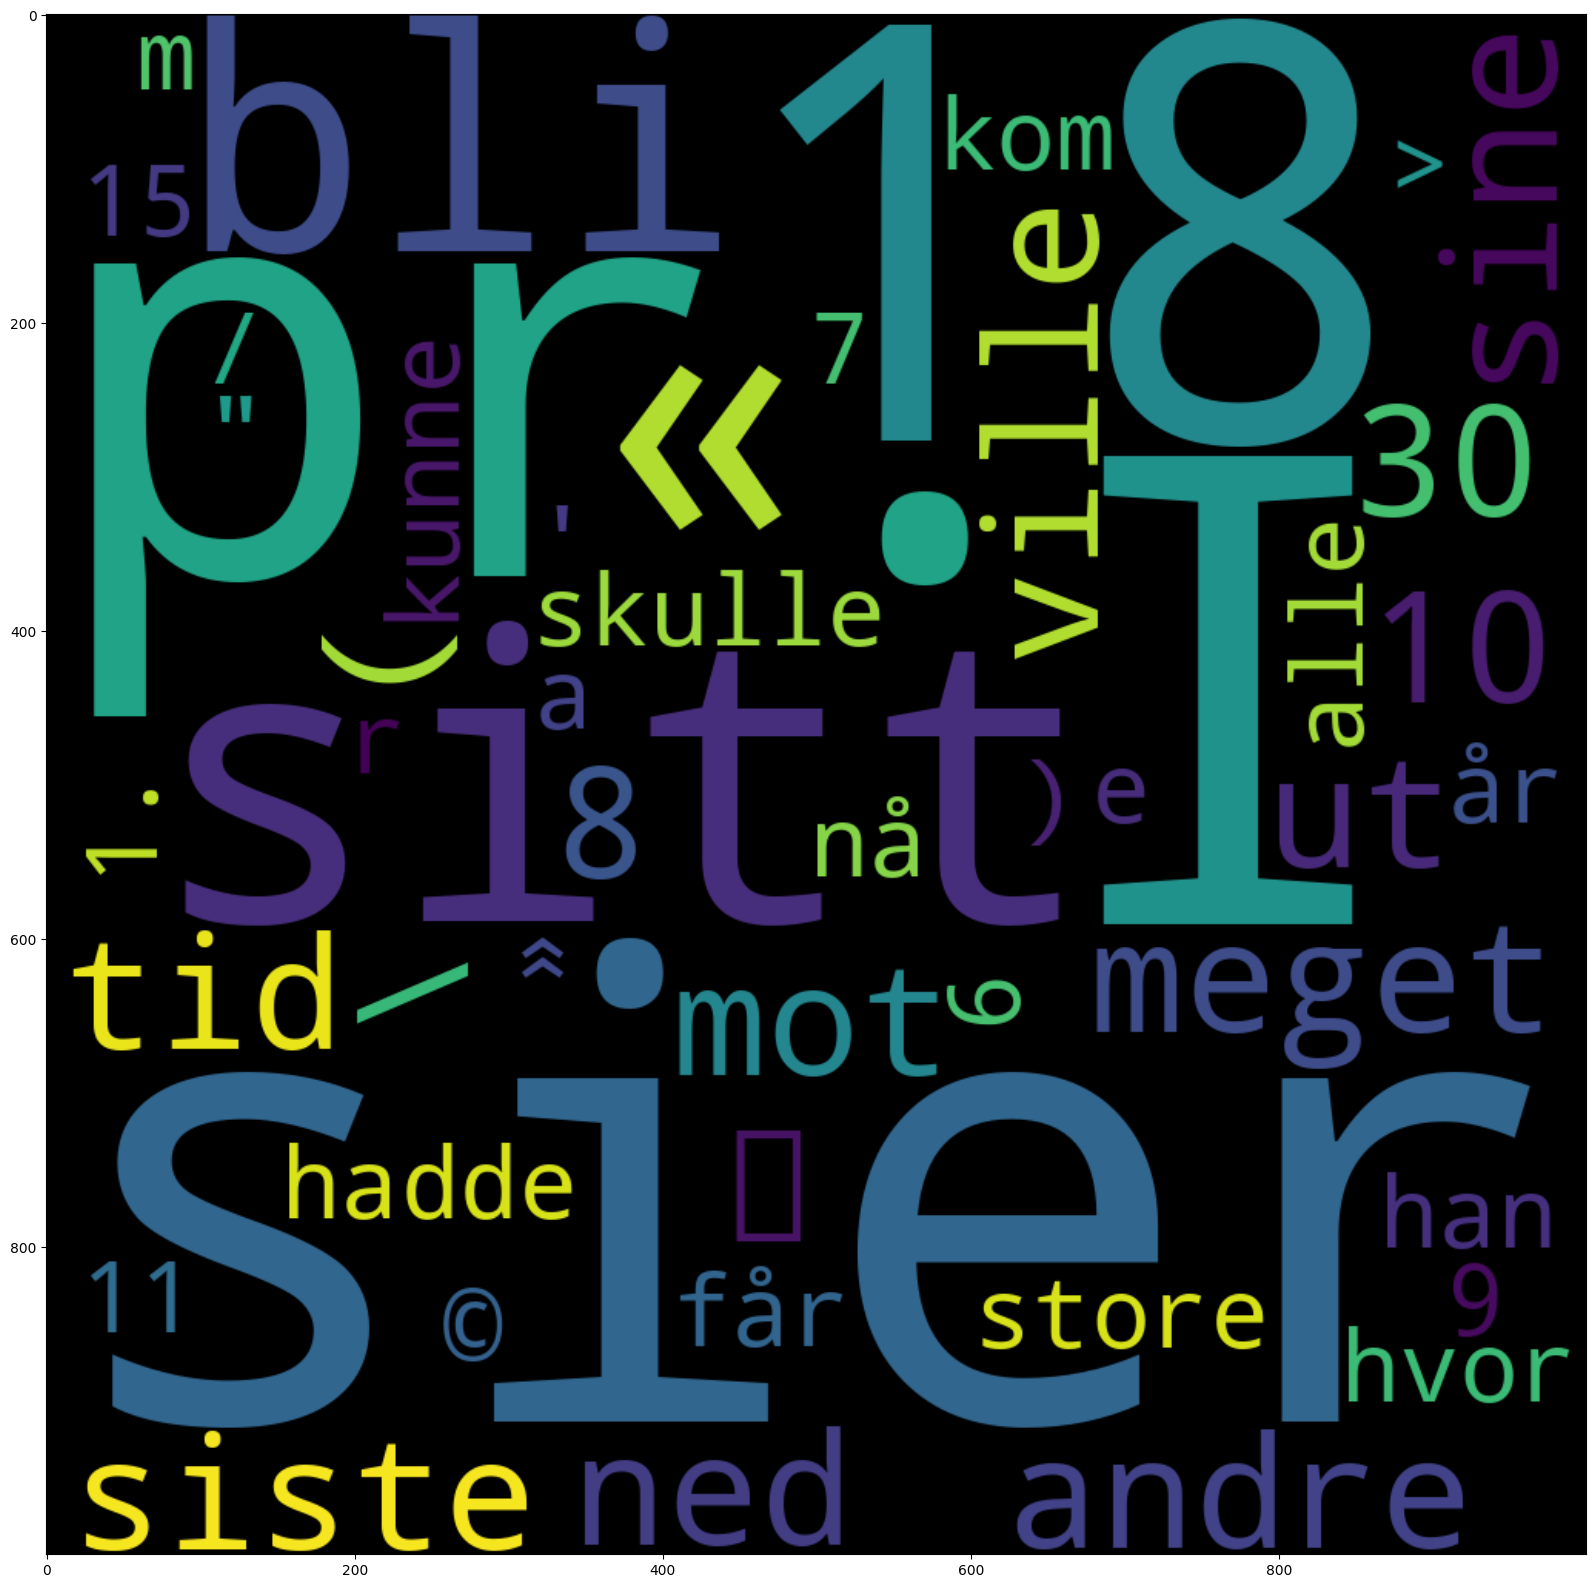

In [27]:
# Her viser vi de 50 viktigste ordene som er assosiert med rødvin i korpuset vårt, målt mot alle bøker i nb.no 

nb.cloud(coll_assoc.head(50)/coll_assoc.sum())

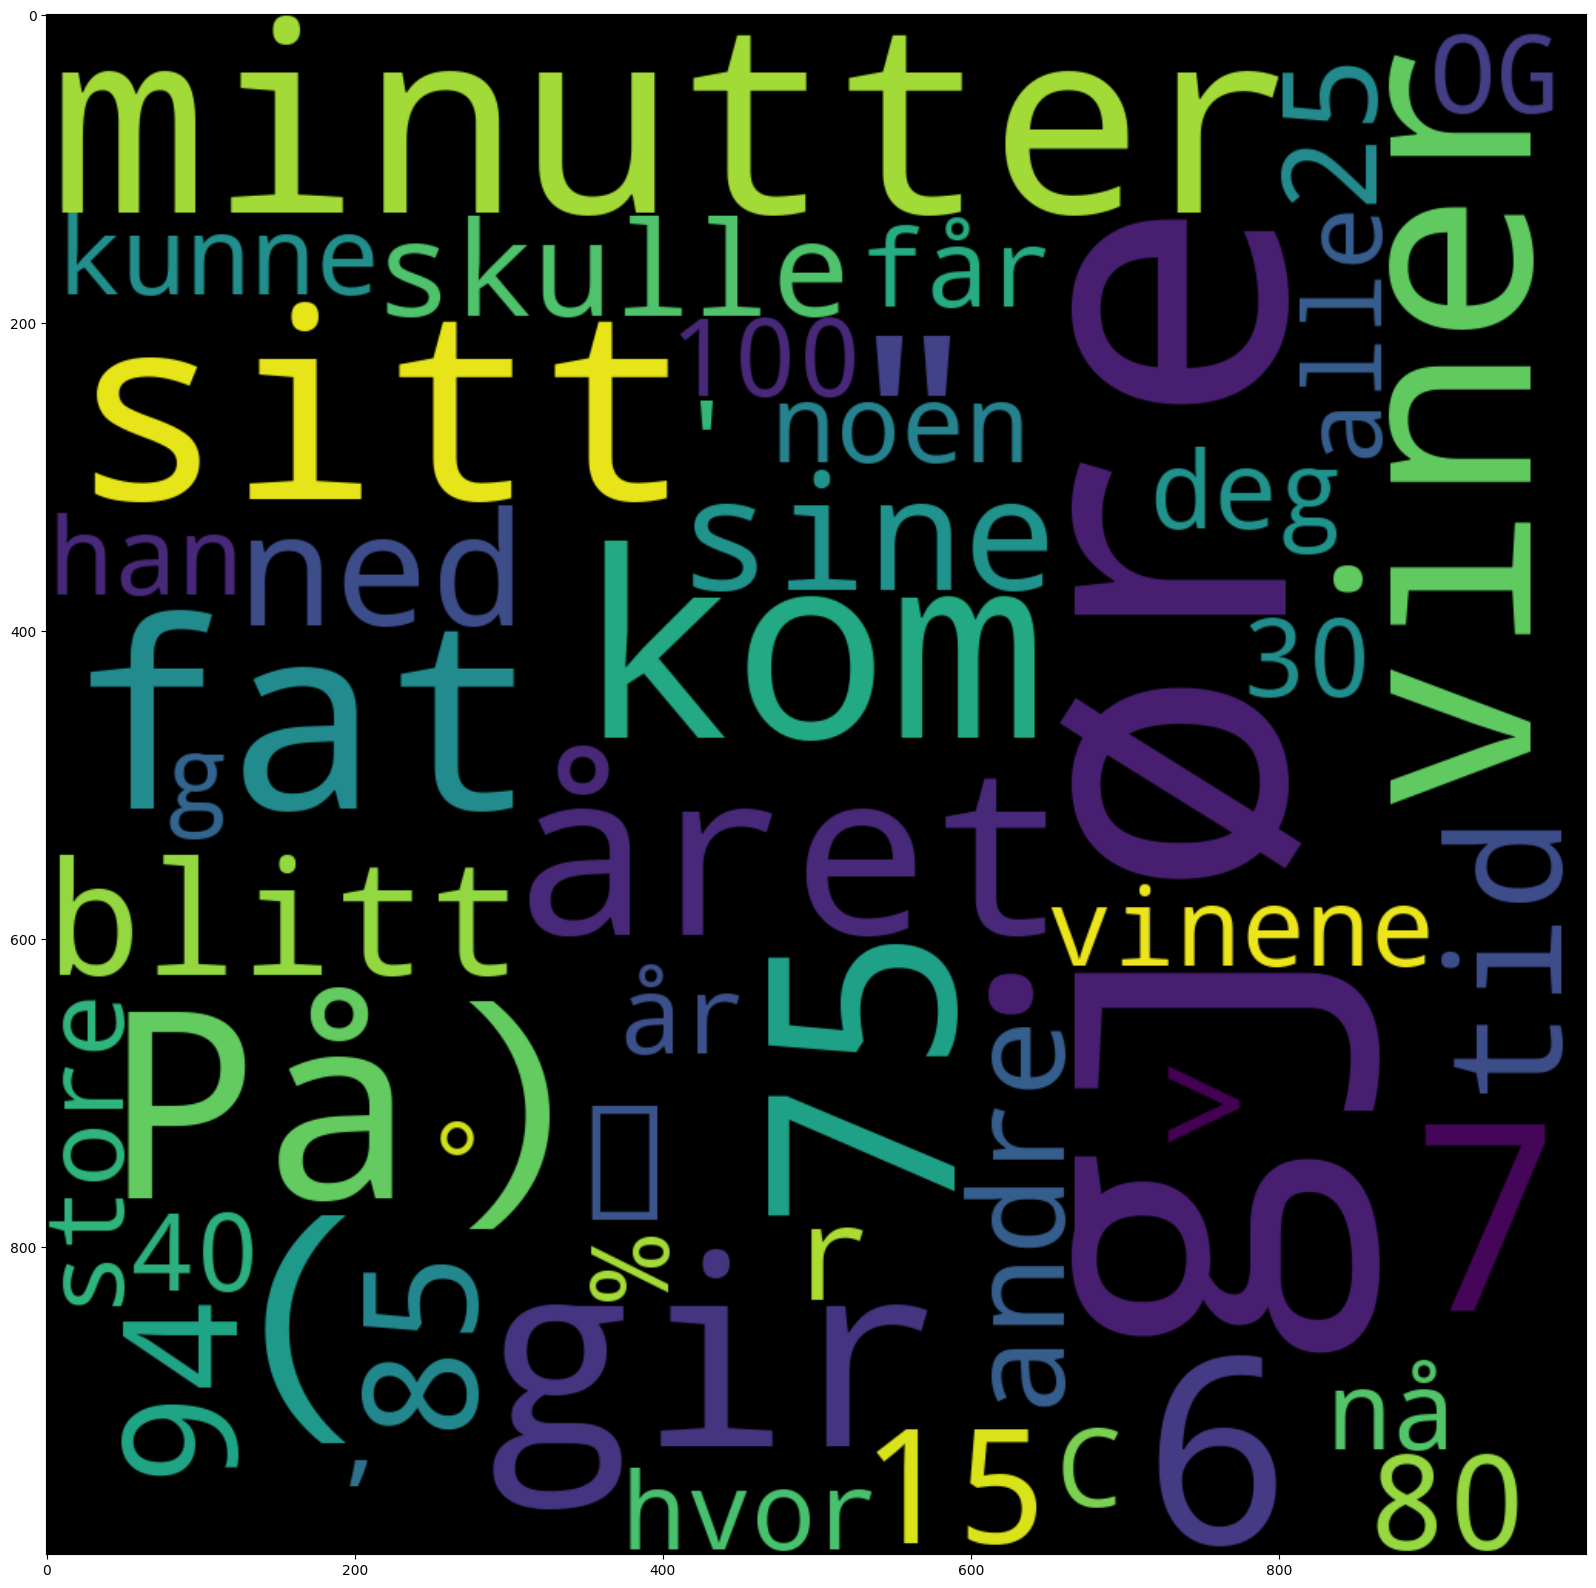

In [28]:
# Her viser vi de 50 viktigste ordene som er assosiert med rødvin, målt mot hele "Drikkevare"-korpuset

nb.cloud(coll_assoc_korp.head(50)/coll_assoc_korp.sum())

## Gjenbruk med andre ord og korpus

1. Bytt ut parametrene i cellen der `korpus` blir definert.
2. Bytt ut ordet som er angitt som `collword`.
3. Gå til `Cell` i menyen og velg `Run All`.

Det er også mulig å først velge `File` og `Make a Copy`, slik at man oppretter en ny notebook før man starter.

Tilbake til [DHLAB ved Nasjonalbiblioteket](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb)